In [1]:
def type_of_operation(x):
    switcher={
        1: 'Failed deprotection operation',
        2: 'Failed freshness check',
        3: 'Failed context lookup',
        4: 'Received a new RTCsec packet',
        5: 'Received data are ready for processing',
        #we convert 81 to decimal we obtain 129
        129: 'Failed protection operation',
        #we convert 82 to decimal we obtain 130
        130: 'Transmission of a RTCsec packet done'
    }
    return switcher.get(x," invalid type of operation")

In [2]:
class Event:
    def __init__(self, type_of_operation, t):
        self.o = type_of_operation
        self.t = t


In [3]:
def extract_data():
    import struct
    b0= struct.unpack('B', b'\x00')[0]

    with open("event_stream.bin", 'rb') as file:
        c=file.read()
    list=[]
    for i in range (0,4096,4):
        b1= struct.unpack('B',c[i:i+1])[0] 
        b2= struct.unpack('B',c[i+1:i+2])[0]
        b3= struct.unpack('B',c[i+2:i+3])[0]
        b4= struct.unpack('B',c[i+3:i+4])[0]
        timestamp=struct.pack('>4B', b0 , b2 , b3 , b4)
        list.append(Event(
                    b1 ,
                    struct.unpack('>i',timestamp) [0])
                    )
    
    return(list)
    

In [42]:
PrimaryList = extract_data()

In [43]:
def CorrectOverFitting():
    l= extract_data()
    added_byte= 0x1_00_00_00
    for i in range(1,len(l)):
        while (l[i].t<l[i-1].t):
            if (l[i].t+added_byte)< l[i-1].t :
                added_byte +=0x1_00_00_00
            else:
                l[i].t+=added_byte 
    return(l)

In [44]:
Corrected_values = CorrectOverFitting()


In [45]:
def research_of_a_specific_operation(x):
    l=CorrectOverFitting()
    wanted_type_of_operation=[]
    for i in l:
        if i.o == x:
            wanted_type_of_operation.append((len(wanted_type_of_operation)+1,i.t))
           # print('RTC packet number' , len(RTC_packet_list) , 'took',  i.t, 'ns')
    return(wanted_type_of_operation)

In [46]:
def pourcentage_of_operation(x):
    return(round(len(research_of_a_specific_operation(x))/len(CorrectOverFitting()),3))

In [47]:
pourcentage_of_operation(1)

0.0

In [48]:
def pie_appearancee_of_operations():
    import matplotlib.pyplot as plt
    type_operations=[1,2,3,4,5,129,130]
    p=[]
    operations=[type_of_operation(i) for i in type_operations]
    for i in type_operations:
        p.append(pourcentage_of_operation(i))
    #y = np.array(p)
    plt.figure(figsize=(20 , 10))
    plt.pie(p, labels = operations,pctdistance = 0.7, autopct = lambda p: str(round(p,3)) + '%',)
    plt.legend(loc="upper right", title= "type of operations", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show() 
    return (p)


    

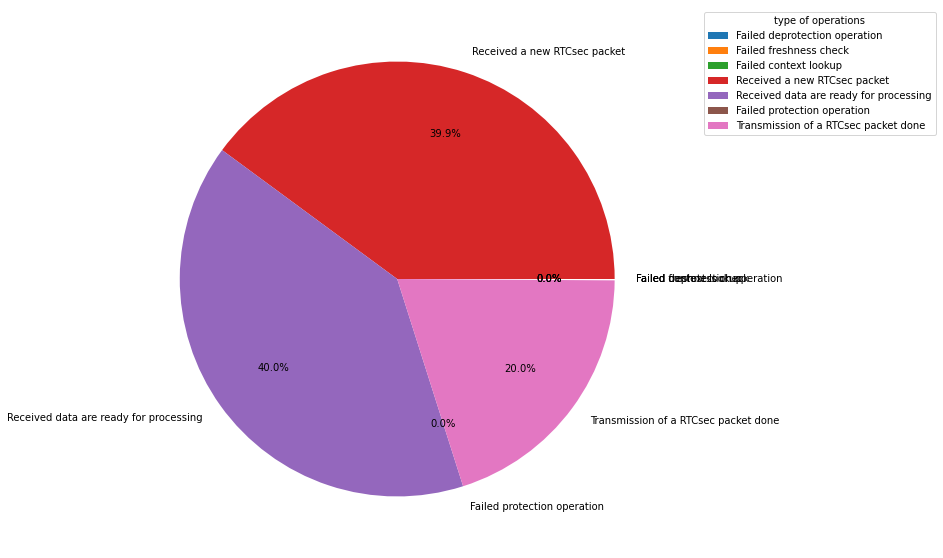

[0.0, 0.0, 0.0, 0.399, 0.4, 0.0, 0.2]


In [49]:
print (pie_appearancee_of_operations())

In [50]:
l=extract_data()
l[8].o

130

In [51]:
def timestamp():
    timestamp_list=[]
    l=extract_data()
    for i in range (0,len (l)):
        if (i==0):
            t1=0
        else:
            t1=t2
        
        t2=l[i].t
        
        dt=t2-t1
        
        if dt<0:
            dt+= 0x1_00_00_00
            
        timestamp_list.append( Event(l[i].o,dt) ) 
        print ("after ", dt,'ns', type_of_operation(l[i].o), "happened")
    return (timestamp_list)
    
    
    

In [52]:
timestamp()


after  6203222 ns Received data are ready for processing happened
after  822530 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  3652352 ns Transmission of a RTCsec packet done happened
after  3983105 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  2460418 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  9354240 ns Transmission of a RTCsec packet done happened
after  14796033 ns Received a new RTCsec packet happened
after  2621696 ns Received data are ready for processing happened
after  12485378 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  5227521 ns Transmission of a RTCsec packet done happened
after  13287936 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  9

after  13468673 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  13682177 ns Transmission of a RTCsec packet done happened
after  13483777 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  6587905 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  12503297 ns Transmission of a RTCsec packet done happened
after  4963841 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  11175425 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  16435457 ns Transmission of a RTCsec packet done happened
after  9420545 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  9405698 ns Received a new RTCsec packet happened
after  2621440

after  4752897 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  5876737 ns Transmission of a RTCsec packet done happened
after  12049153 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  8553729 ns Received a new RTCsec packet happened
after  2621696 ns Received data are ready for processing happened
after  11971585 ns Transmission of a RTCsec packet done happened
after  7723777 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  11044353 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  13806849 ns Transmission of a RTCsec packet done happened
after  4315905 ns Received a new RTCsec packet happened
after  2621440 ns Received data are ready for processing happened
after  5080577 ns Received a new RTCsec packet happened
after  2621440 n

 ...]

In [53]:
def time_difference_between_2_operations( operation1, operation2, n):
    x=0
    l=CorrectOverFitting()
    for i in range(len(l)):
        
        if (l[i].o == operation1):
            if (x<n):
                for j in range(i+1,len(l)):
                
                    if (l[j].o == operation2):
                        dt= l[j].t - l[i].t
                        print('time difference between', type_of_operation(operation1),'and',type_of_operation(operation2), dt)
                        break
                x+=1
                
            

In [54]:
time_difference_between_2_operations(5, 4,10)

time difference between Received data are ready for processing and Received a new RTCsec packet 822530
time difference between Received data are ready for processing and Received a new RTCsec packet 7635457
time difference between Received data are ready for processing and Received a new RTCsec packet 2460418
time difference between Received data are ready for processing and Received a new RTCsec packet 24150273
time difference between Received data are ready for processing and Received a new RTCsec packet 12485378
time difference between Received data are ready for processing and Received a new RTCsec packet 18515457
time difference between Received data are ready for processing and Received a new RTCsec packet 99842
time difference between Received data are ready for processing and Received a new RTCsec packet 7964161
time difference between Received data are ready for processing and Received a new RTCsec packet 2657282
time difference between Received data are ready for processing a

In [68]:
timestamps_of_corrected_values=[]
primarytimestamps=[]

for i in PrimaryList :
    primarytimestamps.append(Event(i.o,i.t)) 
    
for i in Corrected_values:
    timestamps_of_corrected_values.append(Event(i.o, i.t))

In [91]:
def visualize_timestamps_of_operations(x):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(40 , 20))

    my_colors = {1:'red',2:'green',3:'blue', 4:'magenta',5:'black' ,129:'cyan',130:'yellow'}

    for i in range (x):
        
        plt.plot(i, timestamps_of_corrected_values[i].t, marker = 'o', color= my_colors.get(timestamps_of_corrected_values[i].o))
        plt.plot(i, primarytimestamps[i].t, marker = '*', color= my_colors.get(primarytimestamps[i].o))
    plt.ylabel("t")
    plt.xlabel("Number of operation")
    plt.grid()
    plt.savefig('visualize_timestamps_of_' + str(x) + '_operations.png')
    plt.show()


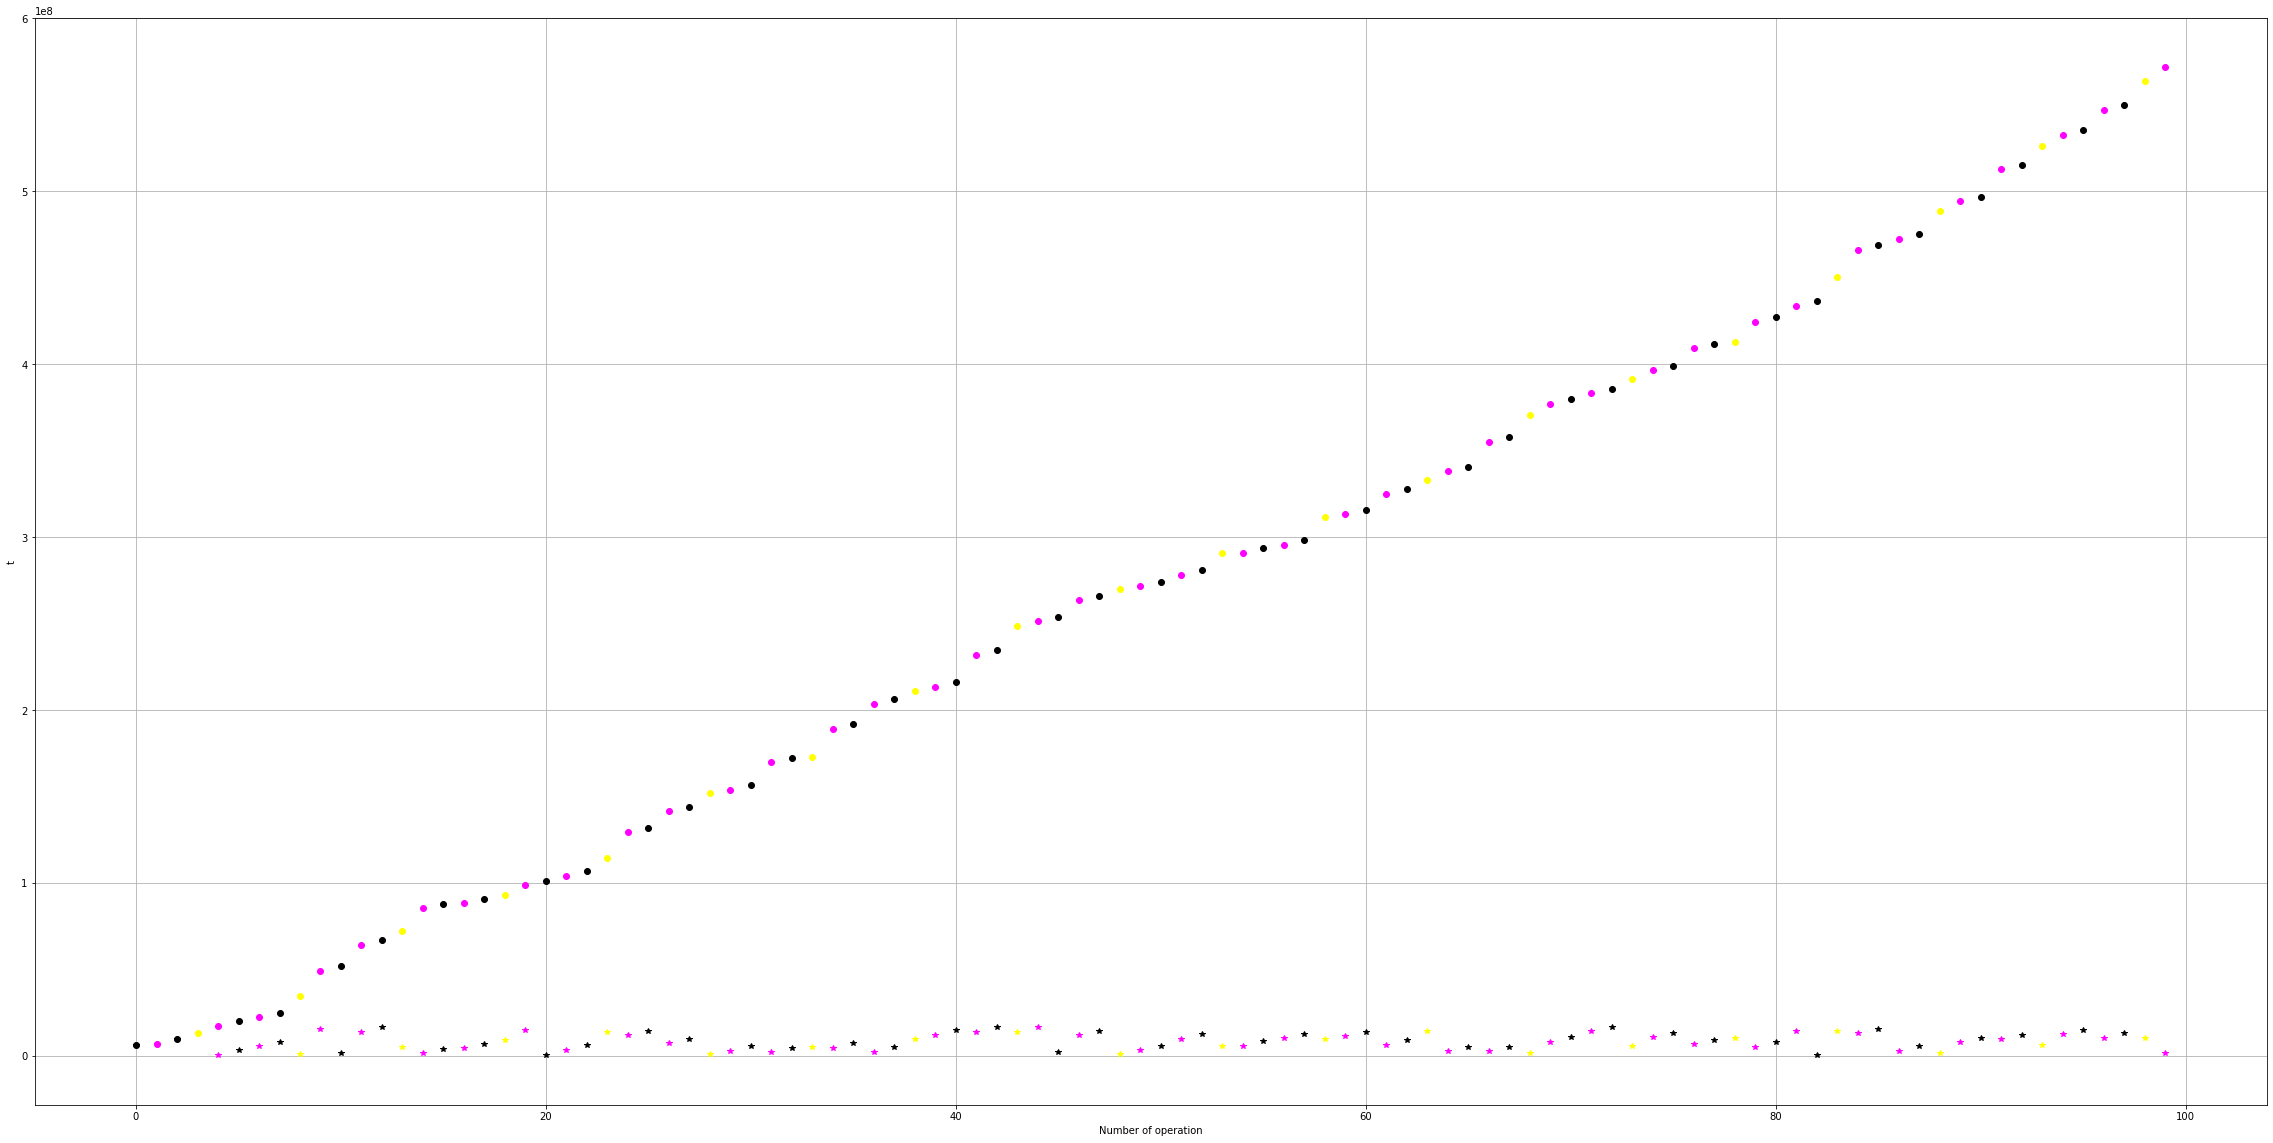

In [93]:
visualize_timestamps_of_operations(100)

TypeError: float() argument must be a string or a number, not 'Event'

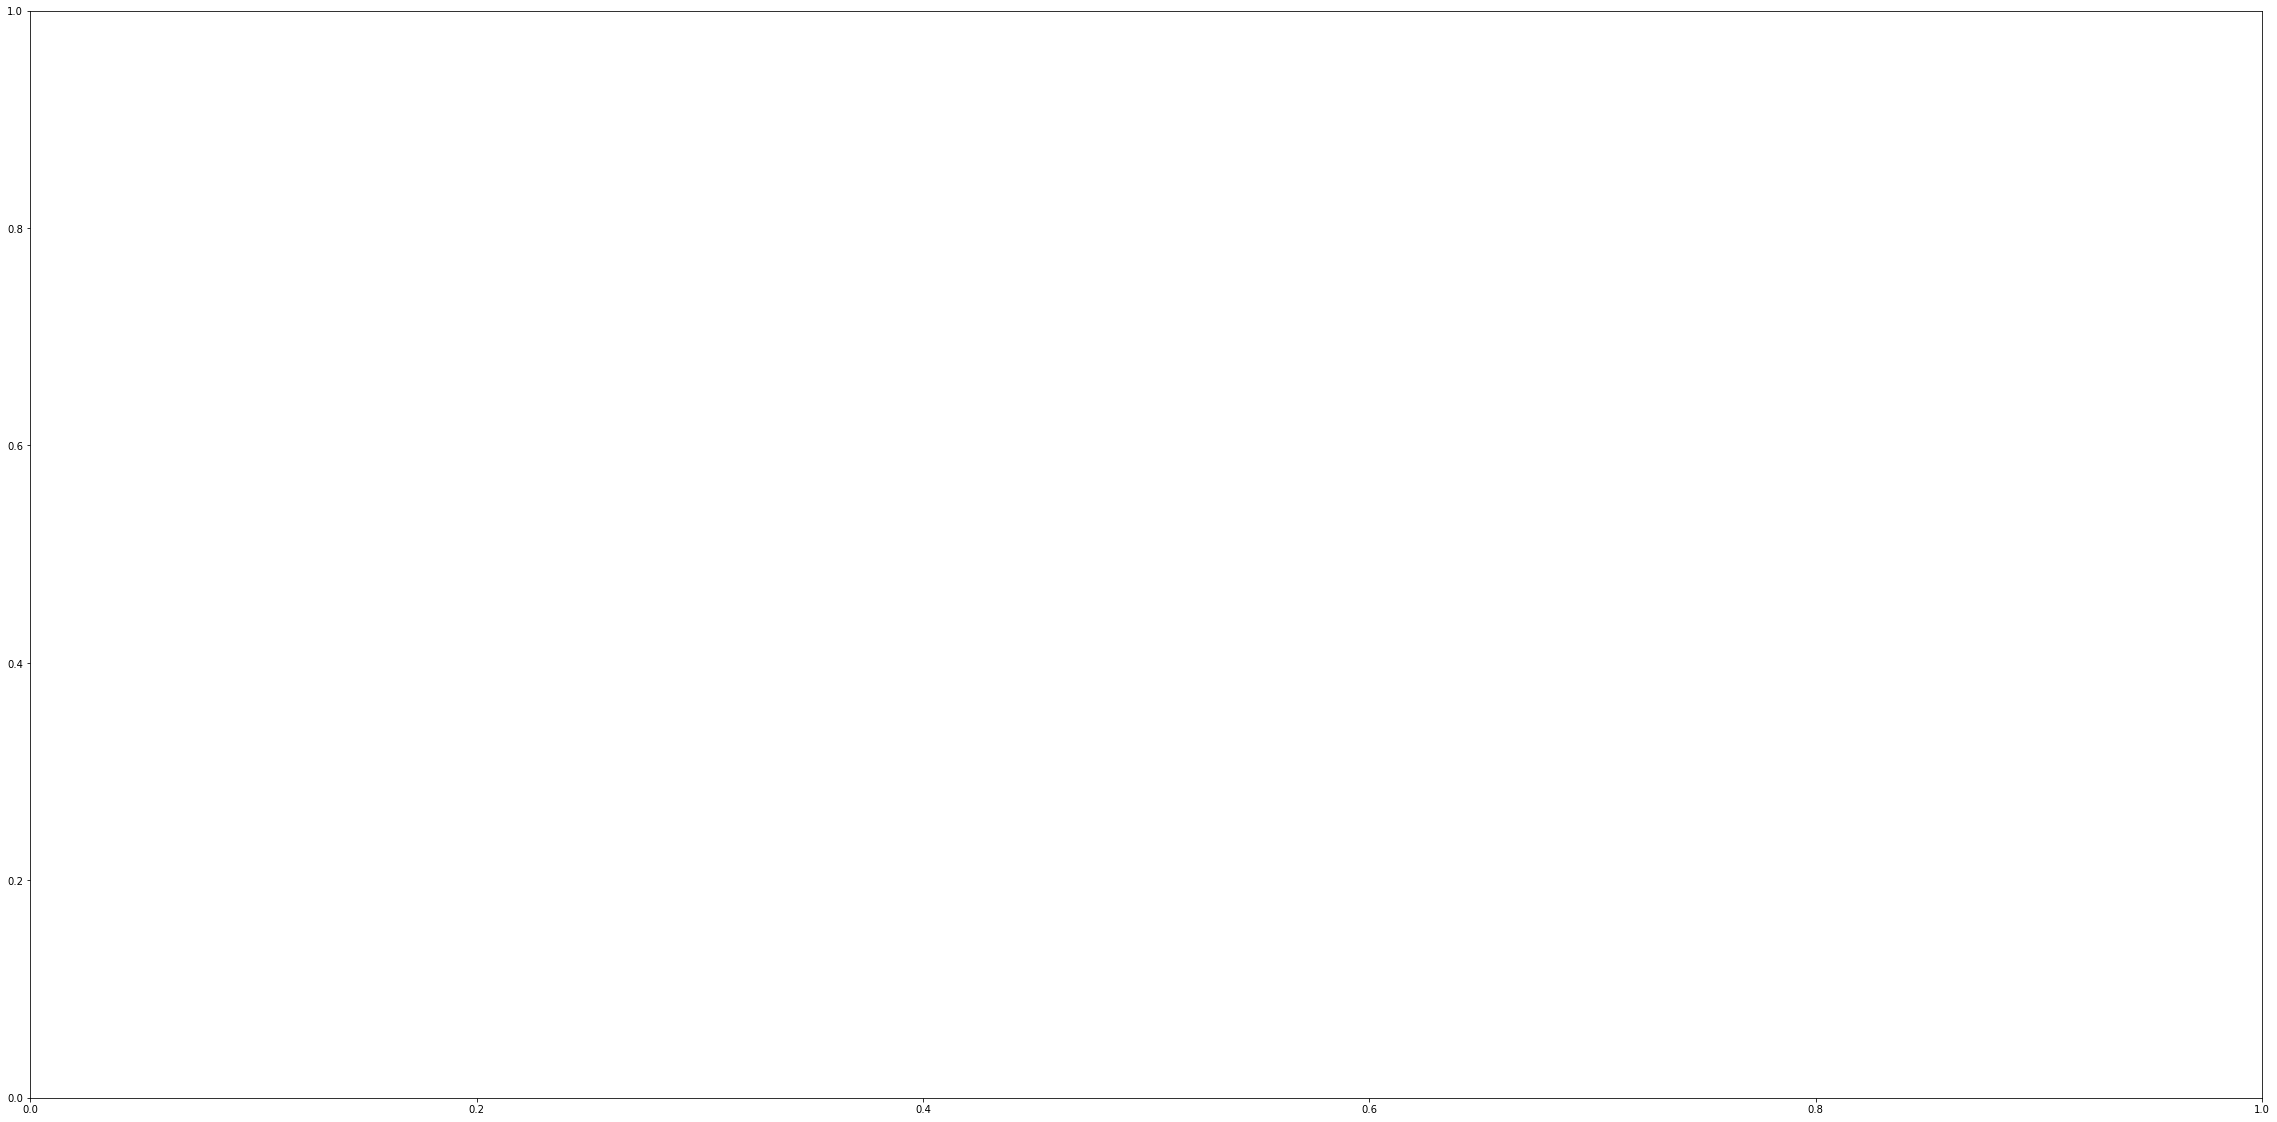

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40 , 20))
plt.plot( timestamps_of_corrected_values[0:50],range(0,50), marker = 'o')
plt.plot(primarytimestamps[0:50],range(0,50),  marker = '*')
plt.ylabel("number of events")
plt.xlabel("t")
plt.grid()
#plt.savefig('Time representation1.png')
plt.show()


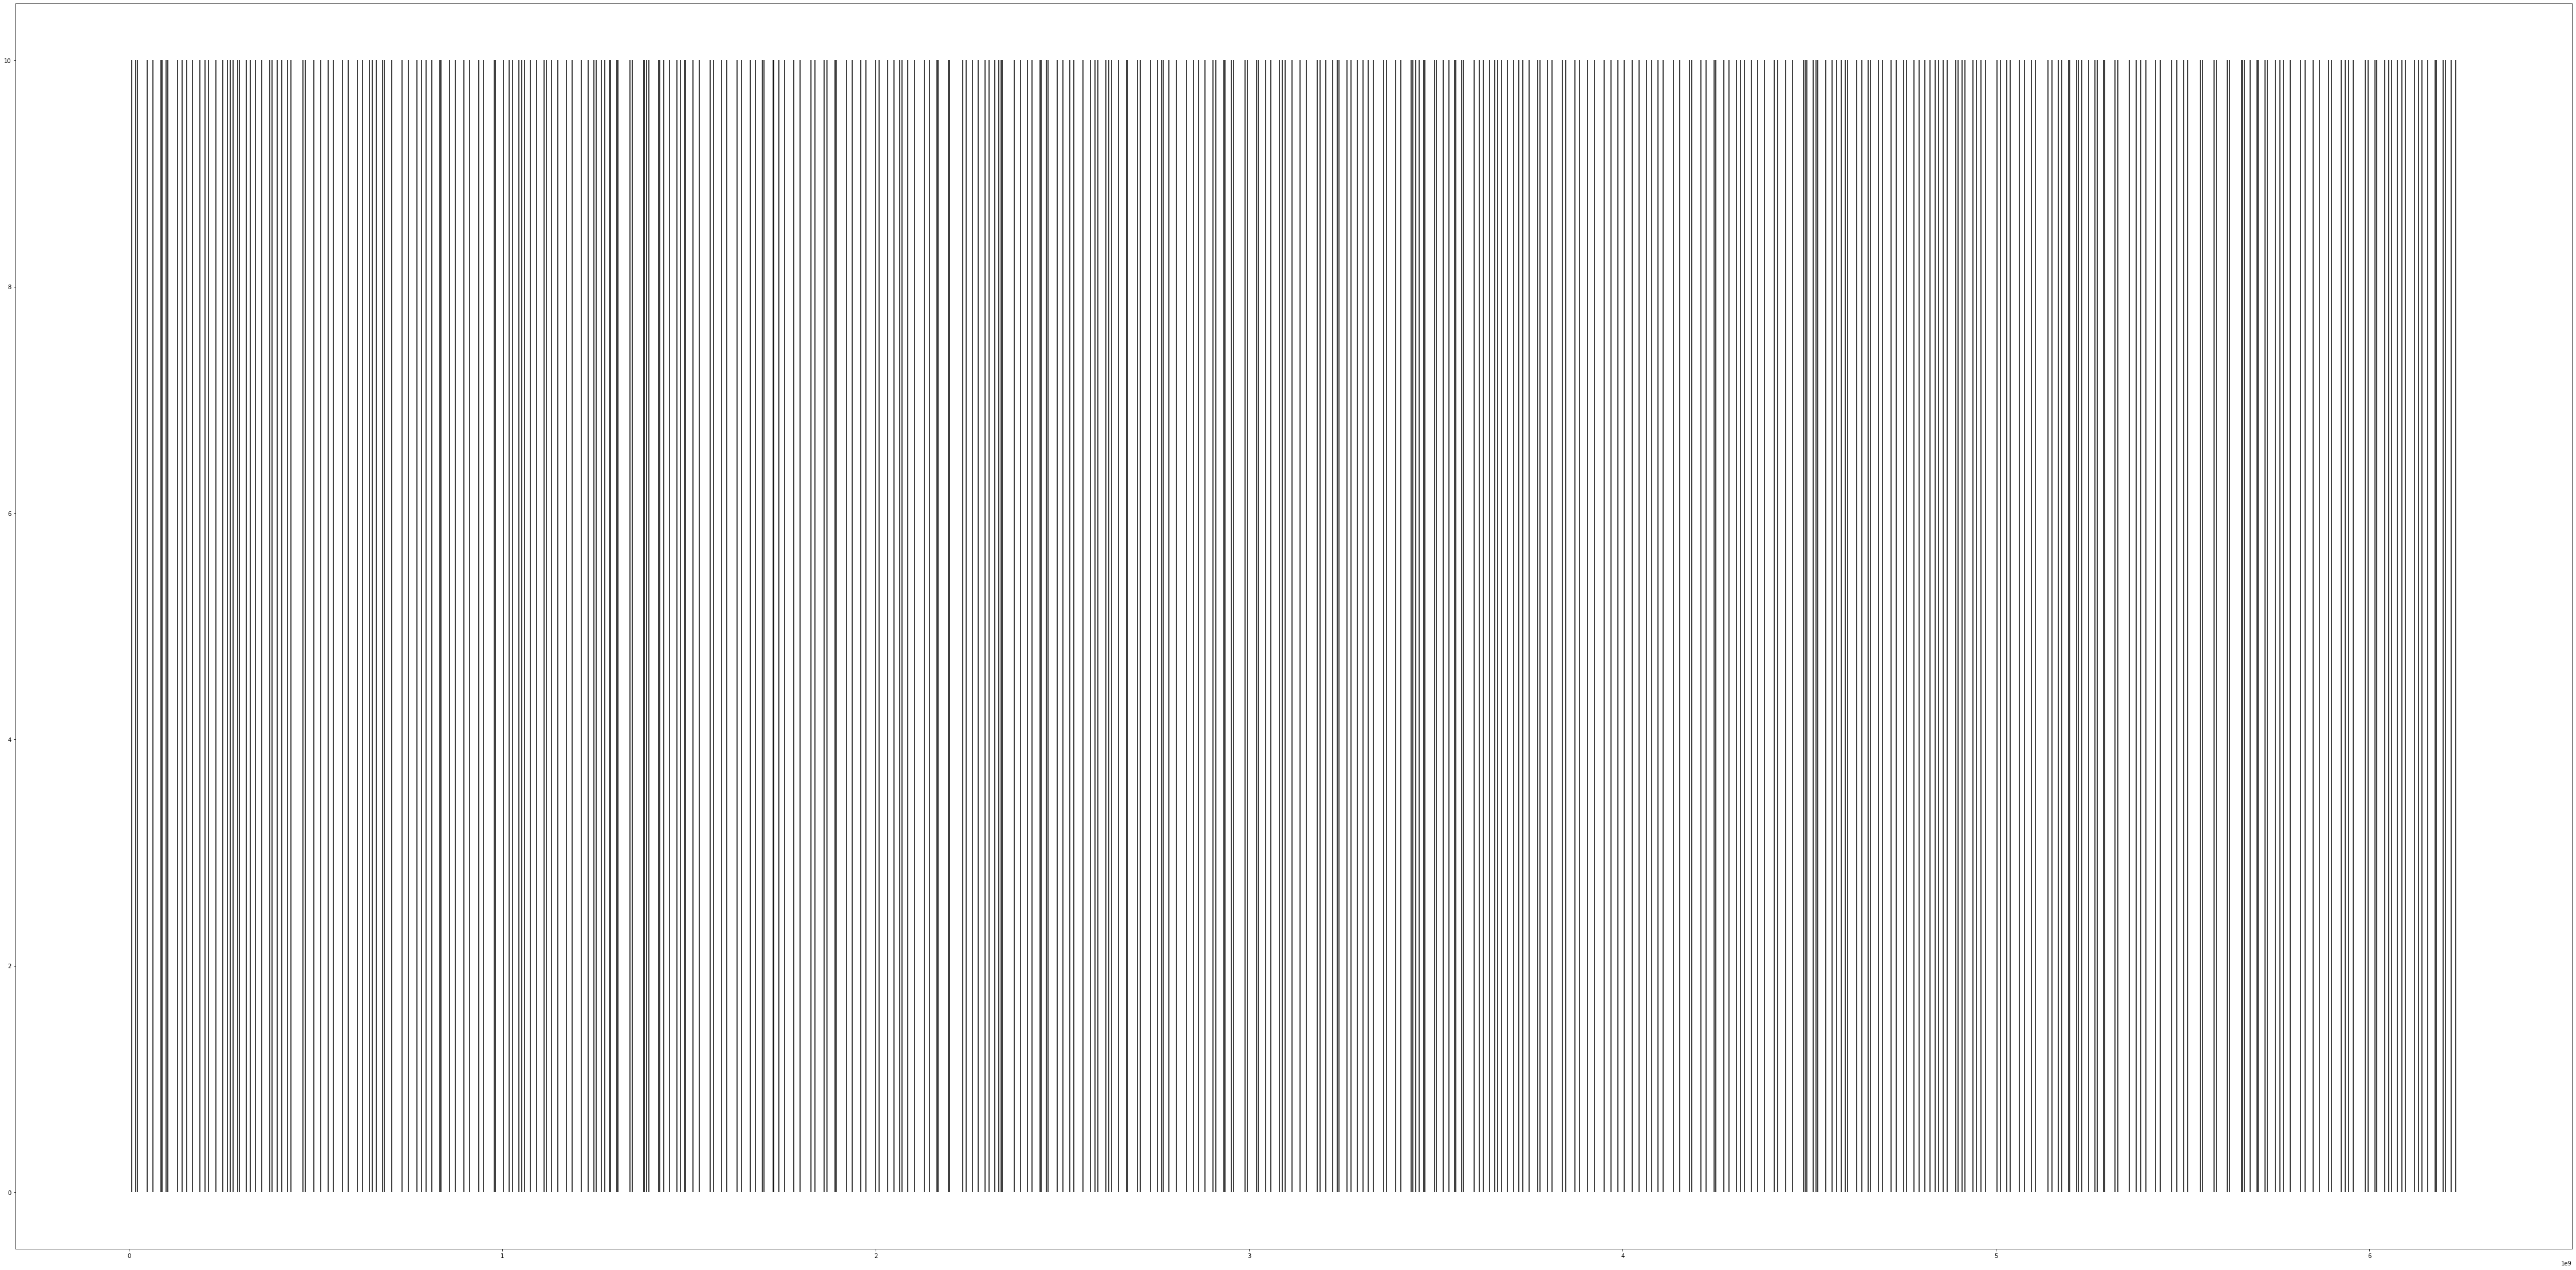

In [84]:
x_val = [x[0] for x in research_of_new_RTC_packet()]
y_val = [x[1] for x in research_of_new_RTC_packet()] 
#print(y_val)
plt.figure(figsize=(80 , 40))

#plt.bar(10, y_val, align="center", width=1, alpha=1)
plt.vlines(y_val,ymin =0 , ymax = 10)

plt.show()